In [1]:
library(dplyr)
library(readxl)
library(ggplot2)



Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [2]:
data <-read_excel("Labour_force_status_by_sex_australia.xls",
                  sheet=2, col_names = TRUE)

New names:
* `` -> ...1
* `Employed total ;  Persons ;` -> `Employed total ;  Persons ;...2`
* `Employed total ;  Persons ;` -> `Employed total ;  Persons ;...3`
* `Employed total ;  Persons ;` -> `Employed total ;  Persons ;...4`
* `Employed total ;  > Males ;` -> `Employed total ;  > Males ;...5`
* ...


In [3]:
head(data)

...1             Employed total ;  Persons ;...2
1 Unit             000                            
2 Series Type      Trend                          
3 Data Type        STOCK                          
4 Frequency        Month                          
5 Collection Month 1                              
6 Series Start     28522                          
  Employed total ;  Persons ;...3 Employed total ;  Persons ;...4
1 000                             000                            
2 Seasonally Adjusted             Original                       
3 STOCK                           STOCK                          
4 Month                           Month                          
5 1                               1                              
6 28522                           28522                          
  Employed total ;  > Males ;...5 Employed total ;  > Males ;...6
1 000                             000                            
2 Trend                           Seasonally Adjusted            
3 STOCK                           STOCK                          
4 Month                           Month                          
5 1                               1                              
6 28522                           28522                          
  Employed total ;  > Males ;...7 Employed total ;  > Females ;...8
1 000                             000                              
2 Original                        Trend                            
3 STOCK                           STOCK                            
4 Month                           Month                            
5 1                               1                                
6 28522                           28522                            
  Employed total ;  > Females ;...9 Employed total ;  > Females ;...10 ...
1 000                               000                                ...
2 Seasonally Adjusted               Original                           ...
3 STOCK                             STOCK                              ...
4 Month                             Month                              ...
5 1                                 1                                  ...
6 28522                             28522                              ...
  Participation rate ;  > Males ;...106 Participation rate ;  > Females ;...107
1 Percent                               Percent                                
2 Original                              Trend                                  
3 PERCENT                               PERCENT                                
4 Month                                 Month                                  
5 1                                     1                                      
6 28522                                 28522                                  
  Participation rate ;  > Females ;...108
1 Percent                                
2 Seasonally Adjusted                    
3 PERCENT                                
4 Month                                  
5 1                                      
6 28522                                  
  Participation rate ;  > Females ;...109
1 Percent                                
2 Original                               
3 PERCENT                                
4 Month                                  
5 1                                      
6 28522                                  
  Not in the labour force (NILF) ;  Persons ;
1 000                                        
2 Original                                   
3 STOCK                                      
4 Month                                      
5 1                                          
6 28522                                      
  Not in the labour force (NILF) ;  > Males ;
1 000                                        
2 Original                                   
3 STOCK                                      
4 Month                                      
5 1                 

In [4]:
summary(data)

     ...1           Employed total ;  Persons ;...2
 Length:523         Length:523                     
 Class :character   Class :character               
 Mode  :character   Mode  :character               
 Employed total ;  Persons ;...3 Employed total ;  Persons ;...4
 Length:523                      Length:523                     
 Class :character                Class :character               
 Mode  :character                Mode  :character               
 Employed total ;  > Males ;...5 Employed total ;  > Males ;...6
 Length:523                      Length:523                     
 Class :character                Class :character               
 Mode  :character                Mode  :character               
 Employed total ;  > Males ;...7 Employed total ;  > Females ;...8
 Length:523                      Length:523                       
 Class :character                Class :character                 
 Mode  :character                Mode  :character                 
 Emp

In [5]:
data_filtered = data[c(1, 3, 12, 21, 39, 66)]

In [6]:
data_filtered = data_filtered[-c(1:9),]


In [7]:
head(data_filtered)

...1  Employed total ;  Persons ;...3 > Employed full-time ;  Persons ;...12
1 28522 5997.6563813000002              5079.5623914999996                    
2 28550 6003.2151253000002              5095.4109065000002                    
3 28581 6030.8507968000004              5119.6237529                          
4 28611 6033.3793825000002              5119.0499411999999                    
5 28642 6033.7656501000001              5104.0907526000001                    
6 28672 6030.5121657999998              5096.6224449000001                    
  > Employed part-time ;  Persons ;...21 Unemployed total ;  Persons ;...39
1 918.09398969999995                     426.93649570000002                
2 907.80421890000002                     403.86654149999998                
3 911.22704390000001                     403.29963939999999                
4 914.32944129999998                     399.49233500000003                
5 929.67489750000004                     405.97301390000001                
6 933.88972100000001                     400.199772                        
  Unemployment rate ;  Persons ;...66
1 6.6453471000000004                 
2 6.3034398999999999                 
3 6.2681101999999997                 
4 6.2101709999999999                 
5 6.3041846000000001                 
6 6.2232576000000002

In [8]:
colnames(data_filtered)


[1] "...1"                                  
[2] "Employed total ;  Persons ;...3"       
[3] "> Employed full-time ;  Persons ;...12"
[4] "> Employed part-time ;  Persons ;...21"
[5] "Unemployed total ;  Persons ;...39"    
[6] "Unemployment rate ;  Persons ;...66"

In [9]:
names(data_filtered)[1] <- "Time"
names(data_filtered)[2] <- "Total_Employed_Person"
names(data_filtered)[3] <- "Total_Employed_Fulltime_Person"
names(data_filtered)[4] <- "Total_Employed_Parttime_Person"
names(data_filtered)[5] <- "Total_Unemployed_Person"
names(data_filtered)[6] <- "Unemployment_Rate"

In [10]:
# data_filtered$Time <- as.Date(data_filtered$Time, format = "%m.%Y")
data_filtered$Time <- as.Date(as.numeric(data_filtered$Time), origin = "1899-12-30")

In [11]:
head(data_filtered)

Time       Total_Employed_Person Total_Employed_Fulltime_Person
1 1978-02-01 5997.6563813000002    5079.5623914999996            
2 1978-03-01 6003.2151253000002    5095.4109065000002            
3 1978-04-01 6030.8507968000004    5119.6237529                  
4 1978-05-01 6033.3793825000002    5119.0499411999999            
5 1978-06-01 6033.7656501000001    5104.0907526000001            
6 1978-07-01 6030.5121657999998    5096.6224449000001            
  Total_Employed_Parttime_Person Total_Unemployed_Person Unemployment_Rate 
1 918.09398969999995             426.93649570000002      6.6453471000000004
2 907.80421890000002             403.86654149999998      6.3034398999999999
3 911.22704390000001             403.29963939999999      6.2681101999999997
4 914.32944129999998             399.49233500000003      6.2101709999999999
5 929.67489750000004             405.97301390000001      6.3041846000000001
6 933.88972100000001             400.199772              6.2232576000000002

In [12]:
write.csv(data_filtered,"labour_data_full.csv")


In [72]:
data_filtered_from_2010 = data_filtered[-c(1:383),]

In [73]:
data_filtered_from_2010

Time       Total_Employed_Person Total_Employed_Fulltime_Person
1   2010-01-01 10936.502981400001    7639.4044223000001            
2   2010-02-01 10920.2044448         7622.2161013000004            
3   2010-03-01 10925.4576946         7635.8377084000003            
4   2010-04-01 10937.2658882         7677.9448027999997            
5   2010-05-01 10938.4891873         7695.0000005000002            
6   2010-06-01 10992.672395199999    7712.9301770000002            
7   2010-07-01 11019.0443356         7713.4095917000004            
8   2010-08-01 11060.061117900001    7777.6014366999998            
9   2010-09-01 11088.145347899999    7815.7179088000003            
10  2010-10-01 11104.2932943         7792.6241252999998            
11  2010-11-01 11162.725488100001    7857.7674021000003            
12  2010-12-01 11168.3447689         7854.5365763999998            
13  2011-01-01 11199.845879500001    7863.5489128999998            
14  2011-02-01 11175.822055099999    7895.6809191000002            
15  2011-03-01 11215.1054129         7931.2250471999996            
16  2011-04-01 11182.6498567         7884.0201473999996            
17  2011-05-01 11172.108174700001    7836.6787450000002            
18  2011-06-01 11205.7699323         7907.6786813999997            
19  2011-07-01 11209.7444411         7884.4855887000003            
20  2011-08-01 11216.7463871         7886.6857126000004            
21  2011-09-01 11247.2593122         7897.2027691000003            
22  2011-10-01 11249.068241000001    7915.7761850999996            
23  2011-11-01 11252.301642099999    7882.5284675000003            
24  2011-12-01 11230.709570200001    7915.3650146                  
25  2012-01-01 11305.460521000001    7962.1702697999999            
26  2012-02-01 11271.8165436         7948.9664183000004            
27  2012-03-01 11333.3176939         7966.4918439000003            
28  2012-04-01 11322.3449642         7945.7642814000001            
29  2012-05-01 11363.733396899999    7987.7506960000001            
30  2012-06-01 11339.041066899999    7959.6798208999999            
... ...        ...                   ...                           
102 2018-06-01 12575.2659432         8564.4702013999995            
103 2018-07-01 12571.4018564         8592.2506071999996            
104 2018-08-01 12616.296621699999    8633.7201315999991            
105 2018-09-01 12626.825900600001    8653.3868672000008            
106 2018-10-01 12665.7952941         8697.8977142999993            
107 2018-11-01 12694.9531742         8692.2309492999993            
108 2018-12-01 12722.761511000001    8685.5008596999996            
109 2019-01-01 12750.755213099999    8742.6516453999993            
110 2019-02-01 12754.7680335         8741.4444058999998            
111 2019-03-01 12784.278117600001    8785.9974579000009            
112 2019-04-01 12811.6686448         8780.1573883000001            
113 2019-05-01 12852.097854199999    8780.1078276999997            
114 2019-06-01 12854.6536626         8799.1549212000009            
115 2019-07-01 12881.790829          8834.6549116000006            
116 2019-08-01 12926.2973083         8821.8316157999998            
117 2019-09-01 12936.291344900001    8846.1192556999995            
118 2019-10-01 12912.6775803         8834.9250482000007            
119 2019-11-01 12943.8638871         8836.6011717000001            
120 2019-12-01 12974.713002099999    8837.3924425000005            
121 2020-01-01 12985.5226829         8883.3192779000001            
122 2020-02-01 13003.884924800001    8886.5750413000005            
123 2020-03-01 12998.4245028         8873.8246245999999            
124 2020-04-01 12392.0106889         8637.2149133999992            
125 2020-05-01 12126.323019900001    8534.2373580000003            
126 2020-06-01 12353.282115399999    8508.8333533000005            
127 2020-07-01 12471.0991175         8547.8525246000008            
128 2020-08-01 12634.5172251         8584.8305765999994     

In [74]:
write.csv(data_filtered_from_2010,"labour_data_from_2010.csv")


In [88]:
data_after <- data_filtered_from_2010[, c(2:6)]
data_after[] <- sapply(data_after, as.numeric)
data_after[is.na(data_after)] <- 0
cor_data = cor(data_after)

Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded


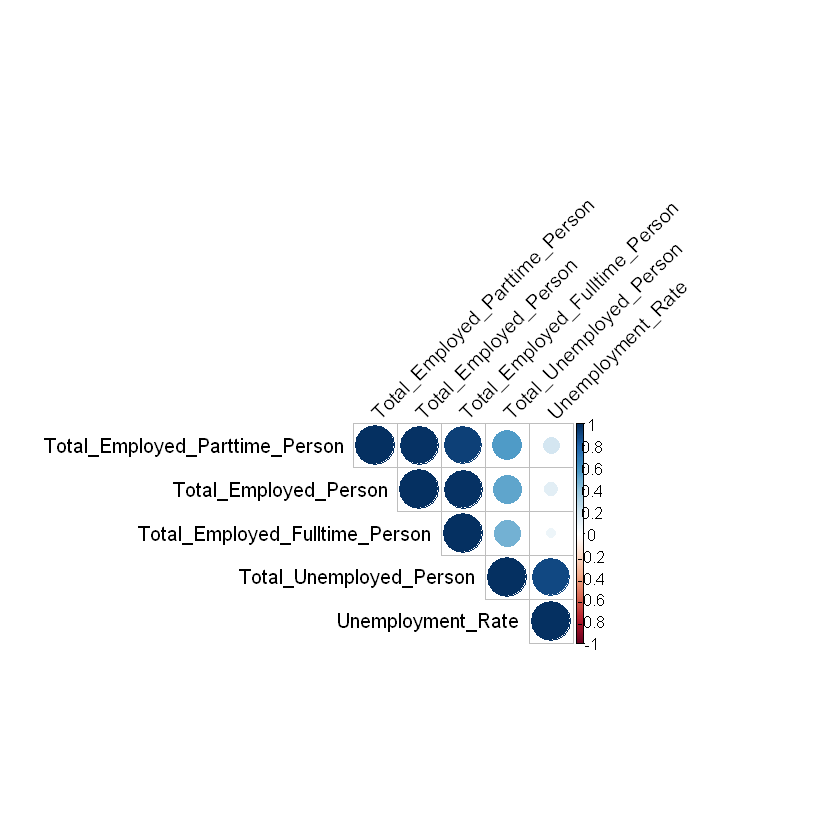

In [89]:
library(corrplot)
corrplot(cor_data, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

In [13]:
business_size_2016_2020 <-read_excel("count_of_australian_businesses_entry_exit_jul2016_jun2020.xls",
                  sheet=17, skip=5, col_names = TRUE)

New names:
* `` -> ...1


In [14]:
business_size_2016_2020

...1                                        Non– employing 1-4    5-19  
1  NA                                          no.            no.    no.   
2  CHANGED BUSINESS SIZE CATEGORY AT JUNE 2017 NA             NA     NA    
3  BUSINESS SIZE CATEGORY AT JUNE 2016         NA             NA     NA    
4  (Employment Size Range)                     NA             NA     NA    
5  Non–employing                               1075363        46274  2076  
6  Employing                                   NA             NA     NA    
7  1–4                                         54629          453836 35751 
8  5–19                                        6542           21536  151203
9  20–199                                      1592           872    5359  
10 200+                                        30             29     9     
11 Total                                       1138156        522547 194398
12 CHANGED BUSINESS SIZE CATEGORY AT JUNE 2018 NA             NA     NA    
13 BUSINESS SIZE CATEGORY AT JUNE 2017         NA             NA     NA    
14 (Employment Size Range)                     NA             NA     NA    
15 Non–employing                               1111374        47510  2189  
16 Employing                                   NA             NA     NA    
17 1–4                                         55944          455900 38038 
18 5–19                                        6791           21768  153707
19 20–199                                      1638           1017   5275  
20 200+                                        25             42     15    
21 Total                                       1175772        526237 199224
22 CHANGED BUSINESS SIZE CATEGORY AT JUNE 2019 NA             NA     NA    
23 BUSINESS SIZE CATEGORY AT JUNE 2018         NA             NA     NA    
24 (Employment Size Range)                     NA             NA     NA    
25 Non–employing                               1162361        47276  2210  
26 Employing                                   NA             NA     NA    
27 1–4                                         56647          458591 37250 
28 5–19                                        6769           22190  158928
29 20–199                                      1649           723    5520  
30 200+                                        27             20     8     
31 Total                                       1227453        528800 203916
32 CHANGED BUSINESS SIZE CATEGORY AT JUNE 2020 NA             NA     NA    
33 BUSINESS SIZE CATEGORY AT JUNE 2019         NA             NA     NA    
34 (Employment Size Range)                     NA             NA     NA    
35 Non–employing                               1216303        43465  2141  
36 Employing                                   NA             NA     NA    
37 1–4                                         62632          455383 35569 
38 5–19                                        7405           23866  161250
39 20–199                                      2862           851    6576  
40 200+                                        32             56     9     
41 Total                                       1289234        523621 205545
42 NA                                          NA             NA     NA    
43 © Commonwealth of Australia 2021            NA             NA     NA    
   20-199 200+ Inflow at end of financial year Outflow at end of financial year
1  no.    no.  no.                             no.                             
2  NA     NA   NA                              NA                              
3  NA     NA   NA                              NA                              
4  NA     NA   NA                              NA                              
5  260    12   62793                           48622                           
6  NA     NA   NA                              NA                              
7  1424   40   68711                           91844                           
8  8406   18   4319

In [15]:
business_size_2016_2017 = business_size_2016_2020[c(5:11),]
business_size_2016_2017 = business_size_2016_2017[c(-2),]

In [16]:
business_size_2016_2017

...1          Non– employing 1-4    5-19   20-199 200+
1 Non–employing 1075363        46274  2076   260    12  
2 1–4           54629          453836 35751  1424   40  
3 5–19          6542           21536  151203 8406   18  
4 20–199        1592           872    5359   40808  426 
5 200+          30             29     9      249    3350
6 Total         1138156        522547 194398 51147  3846
  Inflow at end of financial year Outflow at end of financial year
1 62793                           48622                           
2 68711                           91844                           
3 43195                           36502                           
4 10339                           8249                            
5 496                             317                             
6 185534                          185534                          
  Net movement of surviving businesses
1 14171                               
2 -23133                              
3 6693                                
4 2090                                
5 179                                 
6 0

In [17]:
names(business_size_2016_2017)[1] <- "Business_Size"
size_2016_2017 = diag(as.matrix(business_size_2016_2017[,2:6]))

In [18]:
business_size = colnames(business_size_2016_2017)[2:6]

In [19]:
size_2016_2017

[1] "1075363" "453836"  "151203"  "40808"   "3350"

In [20]:
business_size_2017_2018 = business_size_2016_2020[c(15:21),]
business_size_2017_2018 = business_size_2017_2018[c(-2),]

In [21]:
business_size_2017_2018

...1          Non– employing 1-4    5-19   20-199 200+
1 Non–employing 1111374        47510  2189   253    8   
2 1–4           55944          455900 38038  1222   23  
3 5–19          6791           21768  153707 9966   23  
4 20–199        1638           1017   5275   41842  519 
5 200+          25             42     15     278    3404
6 Total         1175772        526237 199224 53561  3977
  Inflow at end of financial year Outflow at end of financial year
1 64398                           49960                           
2 70337                           95227                           
3 45517                           38548                           
4 11719                           8449                            
5 573                             360                             
6 192544                          192544                          
  Net movement of surviving businesses
1 14438                               
2 -24890                              
3 6969                                
4 3270                                
5 213                                 
6 0

In [60]:
names(business_size_2017_2018)[1] <- "Business_Size"
size_2017_2018 = diag(as.matrix(business_size_2017_2018[,2:6]))
size_2017_2018

[1] "2017_2018"

In [23]:
business_size_2018_2019 = business_size_2016_2020[c(25:31),]
business_size_2018_2019 = business_size_2018_2019[c(-2),]
business_size_2018_2019

...1          Non– employing 1-4    5-19   20-199 200+
1 Non–employing 1162361        47276  2210   316    13  
2 1–4           56647          458591 37250  1470   48  
3 5–19          6769           22190  158928 8962   20  
4 20–199        1649           723    5520   44704  406 
5 200+          27             20     8      220    3703
6 Total         1227453        528800 203916 55672  4190
  Inflow at end of financial year Outflow at end of financial year
1 65092                           49815                           
2 70209                           95415                           
3 44988                           37941                           
4 10968                           8298                            
5 487                             275                             
6 191744                          191744                          
  Net movement of surviving businesses
1 15277                               
2 -25206                              
3 7047                                
4 2670                                
5 212                                 
6 0

In [24]:
names(business_size_2018_2019)[1] <- "Business_Size"
size_2018_2019 = diag(as.matrix(business_size_2018_2019[,2:6]))
size_2018_2019

[1] "1162361" "458591"  "158928"  "44704"   "3703"

In [25]:
business_size_2019_2020 <-read_excel("count_of_australian_businesses_entry_exit_jul2016_jun2020.xls",
                  sheet=18, skip=5, col_names = TRUE)

New names:
* `` -> ...1


In [26]:
business_size_2019_2020

...1                                        Non– employing 1-4    5-19  
1  NA                                          no.            no.    no.   
2  CHANGED BUSINESS SIZE CATEGORY AT JUNE 2020 NA             NA     NA    
3  BUSINESS SIZE CATEGORY AT JUNE 2019         NA             NA     NA    
4  (Employment Size Range)                     NA             NA     NA    
5  Non–employing                               1216303        42115  3374  
6  Employing                                   NA             NA     NA    
7  1–4                                         62723          460672 32030 
8  5–19                                        7410           31357  159228
9  20–199                                      2759           1024   8655  
10 200+                                        39             26     12    
11 Total                                       1289234        535194 203299
12 NA                                          NA             NA     NA    
13 © Commonwealth of Australia 2021            NA             NA     NA    
   20-199 200+ Inflow at end of financial year Outflow at end of financial year
1  no.    no.  no.                             no.                             
2  NA     NA   NA                              NA                              
3  NA     NA   NA                              NA                              
4  NA     NA   NA                              NA                              
5  382    8    72931                           45879                           
6  NA     NA   NA                              NA                              
7  517    14   74522                           95284                           
8  4794   9    44071                           43570                           
9  40076  213  6046                            12651                           
10 353    3839 244                             430                             
11 46122  4083 197985                          197985                          
12 NA     NA   NA                              NA                              
13 NA     NA   NA                              NA                              
   Net movement of surviving businesses
1  no.                                 
2  NA                                  
3  NA                                  
4  NA                                  
5  27052                               
6  NA                                  
7  -20762                              
8  501                                 
9  -6605                               
10 -186                                
11 0                                   
12 NA                                  
13 NA

In [27]:
business_size_2019_2020 = business_size_2019_2020[c(5:11),]
business_size_2019_2020 = business_size_2019_2020[c(-2),]
business_size_2019_2020

...1          Non– employing 1-4    5-19   20-199 200+
1 Non–employing 1216303        42115  3374   382    8   
2 1–4           62723          460672 32030  517    14  
3 5–19          7410           31357  159228 4794   9   
4 20–199        2759           1024   8655   40076  213 
5 200+          39             26     12     353    3839
6 Total         1289234        535194 203299 46122  4083
  Inflow at end of financial year Outflow at end of financial year
1 72931                           45879                           
2 74522                           95284                           
3 44071                           43570                           
4 6046                            12651                           
5 244                             430                             
6 197985                          197985                          
  Net movement of surviving businesses
1 27052                               
2 -20762                              
3 501                                 
4 -6605                               
5 -186                                
6 0

In [28]:
names(business_size_2019_2020)[1] <- "Business_Size"
size_2019_2020 = diag(as.matrix(business_size_2019_2020[,2:6]))
size_2019_2020

[1] "1216303" "460672"  "159228"  "40076"   "3839"

In [29]:
business_size_2010_2014 <-read_excel("count_of_australian_businesses_entry_exit_jun2010_jun2014.xls",
                  sheet=15, skip=5, col_names = TRUE)

New names:
* `` -> ...1


In [30]:
head(business_size_2010_2014)

...1                                        Non–employing 1-4   5-19 20-199
1 NA                                          no.           no.   no.  no.   
2 CHANGED BUSINESS SIZE CATEGORY AT JUNE 2011 NA            NA    NA   NA    
3 BUSINESS SIZE CATEGORY AT JUNE 2010         NA            NA    NA   NA    
4 (Employment Size Ranges)                    NA            NA    NA   NA    
5 Non–employing                               1042971       38665 1587 238   
6 Employing                                   NA            NA    NA   NA    
  200+ Inflow at end of financial year Outflow at end of financial year
1 no.  no.                             no.                             
2 NA   NA                              NA                              
3 NA   NA                              NA                              
4 NA   NA                              NA                              
5 5    64283                           40495                           
6 NA   NA                              NA                              
  Net movement of surviving businesses
1 no.                                 
2 NA                                  
3 NA                                  
4 NA                                  
5 23788                               
6 NA

In [31]:
business_size_2010_2011 = business_size_2010_2014[c(5:11),]
business_size_2010_2011 = business_size_2010_2011[c(-2),]
business_size_2010_2011

...1          Non–employing 1-4    5-19   20-199 200+
1 Non–employing 1042971       38665  1587   238    5   
2 1–4           56494         432986 35286  1283   58  
3 5–19          6422          24245  139998 7657   25  
4 20–199        1346          1075   5661   38545  342 
5 200+          21            33     7      245    3007
6 Total         1107254       497004 182539 47968  3437
  Inflow at end of financial year Outflow at end of financial year
1 64283                           40495                           
2 64018                           93121                           
3 42541                           38349                           
4 9423                            8424                            
5 430                             306                             
6 180695                          180695                          
  Net movement of surviving businesses
1 23788                               
2 -29103                              
3 4192                                
4 999                                 
5 124                                 
6 0

In [32]:
business_size_2011_2012 = business_size_2010_2014[c(15:21),]
business_size_2011_2012 = business_size_2011_2012[c(-2),]
business_size_2011_2012

...1          Non–employing 1-4    5-19   20-199 200+
1 Non–employing 1052102       39802  1775   222    2   
2 1–4           54446         435899 36279  1242   14  
3 5–19          6270          21402  145569 7965   11  
4 20–199        1350          996    5127   39521  361 
5 200+          21            15     10     220    3138
6 Total         1114189       498114 188760 49170  3526
  Inflow at end of financial year Outflow at end of financial year
1 62087                           41801                           
2 62215                           91981                           
3 43191                           35648                           
4 9649                            7834                            
5 388                             266                             
6 177530                          177530                          
  Net movement of surviving businesses
1 20286                               
2 -29766                              
3 7543                                
4 1815                                
5 122                                 
6 0

In [33]:
business_size_2012_2013 = business_size_2010_2014[c(25:31),]
business_size_2012_2013 = business_size_2012_2013[c(-2),]
business_size_2012_2013

...1          Non–employing 1-4    5-19   20-199 200+
1 Non–employing 1037633       38981  1650   223    4   
2 1–4           57206         432068 32917  1022   27  
3 5–19          6694          23410  149040 7540   12  
4 20–199        1461          868    5293   40655  284 
5 200+          13            31     13     204    3188
6 Total         1103007       495358 188913 49644  3515
  Inflow at end of financial year Outflow at end of financial year
1 65374                           40858                           
2 63290                           91172                           
3 39873                           37656                           
4 8989                            7906                            
5 327                             261                             
6 177853                          177853                          
  Net movement of surviving businesses
1 24516                               
2 -27882                              
3 2217                                
4 1083                                
5 66                                  
6 0

In [34]:
business_size_2013_2014 = business_size_2010_2014[c(35:41),]
business_size_2013_2014 = business_size_2013_2014[c(-2),]
business_size_2013_2014

...1          Non–employing 1-4    5-19   20-199 200+
1 Non–employing 1025044       41198  1882   252    7   
2 1–4           51390         423602 32334  1316   25  
3 5–19          6076          23510  149547 7545   14  
4 20–199        1471          817    5600   40655  328 
5 200+          19            28     6      234    3109
6 Total         1084000       489155 189369 50002  3483
  Inflow at end of financial year Outflow at end of financial year
1 58956                           43339                           
2 65553                           85065                           
3 39822                           37145                           
4 9347                            8216                            
5 374                             287                             
6 174052                          174052                          
  Net movement of surviving businesses
1 15617                               
2 -19512                              
3 2677                                
4 1131                                
5 87                                  
6 0

In [35]:
names(business_size_2010_2011)[1] <- "Business_Size"
names(business_size_2011_2012)[1] <- "Business_Size"
names(business_size_2012_2013)[1] <- "Business_Size"
names(business_size_2013_2014)[1] <- "Business_Size"

size_2010_2011 = diag(as.matrix(business_size_2010_2011[,2:6]))
size_2011_2012 = diag(as.matrix(business_size_2011_2012[,2:6]))
size_2012_2013 = diag(as.matrix(business_size_2012_2013[,2:6]))
size_2013_2014 = diag(as.matrix(business_size_2013_2014[,2:6]))


In [36]:
size_2010_2011

[1] "1042971" "432986"  "139998"  "38545"   "3007"

In [37]:
size_2011_2012

[1] "1052102" "435899"  "145569"  "39521"   "3138"

In [38]:
size_2012_2013

[1] "1037633" "432068"  "149040"  "40655"   "3188"

In [39]:
size_2013_2014

[1] "1025044" "423602"  "149547"  "40655"   "3109"

In [40]:
business_size_2014_2018 <-read_excel("count_of_australian_businesses_entry_exit_jun2014_jun2018.xls",
                  sheet=15, skip=5, col_names = TRUE)

New names:
* `` -> ...1


In [41]:
head(business_size_2014_2018)

...1                                        Non–employing 1-4   5-19 20-199
1 NA                                          no.           no.   no.  no.   
2 CHANGED BUSINESS SIZE CATEGORY AT JUNE 2015 NA            NA    NA   NA    
3 BUSINESS SIZE CATEGORY AT JUNE 2014         NA            NA    NA   NA    
4 (Employment Size Range)                     NA            NA    NA   NA    
5 Non–employing                               1033290       42816 1908 260   
6 Employing                                   NA            NA    NA   NA    
  200+ Inflow at end of financial year Outflow at end of financial year
1 no.  no.                             no.                             
2 NA   NA                              NA                              
3 NA   NA                              NA                              
4 NA   NA                              NA                              
5 6    59822                           44990                           
6 NA   NA                              NA                              
  Net movement of surviving businesses
1 no.                                 
2 NA                                  
3 NA                                  
4 NA                                  
5 14832                               
6 NA

In [42]:
business_size_2014_2015 = business_size_2014_2018[c(5:11),]
business_size_2014_2015 = business_size_2014_2015[c(-2),]
business_size_2014_2015

...1          Non–employing 1-4    5-19   20-199 200+
1 Non–employing 1033290       42816  1908   260    6   
2 1–4           51757         436699 29473  1201   38  
3 5–19          6494          24480  150731 7414   19  
4 20–199        1550          735    6285   40655  425 
5 200+          21            32     9      247    3137
6 Total         1093112       504762 188406 49777  3625
  Inflow at end of financial year Outflow at end of financial year
1 59822                           44990                           
2 68063                           82469                           
3 37675                           38407                           
4 9122                            8995                            
5 488                             309                             
6 175170                          175170                          
  Net movement of surviving businesses
1 14832                               
2 -14406                              
3 -732                                
4 127                                 
5 179                                 
6 0

In [43]:
business_size_2015_2016 = business_size_2014_2018[c(15:21),]
business_size_2015_2016 = business_size_2015_2016[c(-2),]
business_size_2015_2016

...1          Non–employing 1-4    5-19   20-199 200+
1 Non–employing 1044357       44606  1970   272    8   
2 1–4           53302         445843 30759  1142   31  
3 5–19          6388          21188  151457 7190   18  
4 20–199        1542          693    5389   41031  360 
5 200+          26            21     15     228    3273
6 Total         1105615       512351 189590 49863  3690
  Inflow at end of financial year Outflow at end of financial year
1 61258                           46856                           
2 66508                           85234                           
3 38133                           34784                           
4 8832                            7984                            
5 417                             290                             
6 175148                          175148                          
  Net movement of surviving businesses
1 14402                               
2 -18726                              
3 3349                                
4 848                                 
5 127                                 
6 0

In [44]:
names(business_size_2014_2015)[1] <- "Business_Size"
names(business_size_2015_2016)[1] <- "Business_Size"

size_2014_2015 = diag(as.matrix(business_size_2014_2015[,2:6]))
size_2015_2016 = diag(as.matrix(business_size_2015_2016[,2:6]))


In [45]:
business_size_df <- data.frame(business_size, size_2010_2011,  size_2011_2012, size_2012_2013, 
                               size_2013_2014, size_2014_2015, size_2015_2016, size_2016_2017,
                               size_2017_2018, size_2018_2019, size_2019_2020)


In [65]:
names(business_size_df)[2] <- "2010-2011"
names(business_size_df)[3] <- "2011-2012"
names(business_size_df)[4] <- "2012-2013"
names(business_size_df)[5] <- "2013-2014"
names(business_size_df)[6] <- "2014-2015"
names(business_size_df)[7] <- "2015-2016"
names(business_size_df)[8] <- "2016-2017"
names(business_size_df)[9] <- "2017-2018"
names(business_size_df)[10] <- "2018-2019"
names(business_size_df)[11] <- "2019-2020"

In [66]:
business_size_df

business_size  2010-2011 2011-2012 2012-2013 2013-2014 2014-2015 2015-2016
1 Non– employing 1042971   1052102   1037633   1025044   1033290   1044357  
2 1-4            432986    435899    432068    423602    436699    445843   
3 5-19           139998    145569    149040    149547    150731    151457   
4 20-199         38545     39521     40655     40655     40655     41031    
5 200+           3007      3138      3188      3109      3137      3273     
  2016-2017 2017-2018 2018-2019 2019-2020
1 1075363   1111374   1162361   1216303  
2 453836    455900    458591    460672   
3 151203    153707    158928    159228   
4 40808     41842     44704     40076    
5 3350      3404      3703      3839

In [67]:
write.csv(business_size_df,"business_size_data_from_2010_to_2020.csv")


In [47]:
library('tidyr')


Warning message:
"package 'tidyr' was built under R version 3.6.3"

In [69]:
business_size_df_long = pivot_longer(business_size_df, -c(business_size), values_to = "Total", names_to = "Year")


In [70]:
business_size_df_long

business_size  Year      Total  
1  Non– employing 2010-2011 1042971
2  Non– employing 2011-2012 1052102
3  Non– employing 2012-2013 1037633
4  Non– employing 2013-2014 1025044
5  Non– employing 2014-2015 1033290
6  Non– employing 2015-2016 1044357
7  Non– employing 2016-2017 1075363
8  Non– employing 2017-2018 1111374
9  Non– employing 2018-2019 1162361
10 Non– employing 2019-2020 1216303
11 1-4            2010-2011 432986 
12 1-4            2011-2012 435899 
13 1-4            2012-2013 432068 
14 1-4            2013-2014 423602 
15 1-4            2014-2015 436699 
16 1-4            2015-2016 445843 
17 1-4            2016-2017 453836 
18 1-4            2017-2018 455900 
19 1-4            2018-2019 458591 
20 1-4            2019-2020 460672 
21 5-19           2010-2011 139998 
22 5-19           2011-2012 145569 
23 5-19           2012-2013 149040 
24 5-19           2013-2014 149547 
25 5-19           2014-2015 150731 
26 5-19           2015-2016 151457 
27 5-19           2016-2017 151203 
28 5-19           2017-2018 153707 
29 5-19           2018-2019 158928 
30 5-19           2019-2020 159228 
31 20-199         2010-2011 38545  
32 20-199         2011-2012 39521  
33 20-199         2012-2013 40655  
34 20-199         2013-2014 40655  
35 20-199         2014-2015 40655  
36 20-199         2015-2016 41031  
37 20-199         2016-2017 40808  
38 20-199         2017-2018 41842  
39 20-199         2018-2019 44704  
40 20-199         2019-2020 40076  
41 200+           2010-2011 3007   
42 200+           2011-2012 3138   
43 200+           2012-2013 3188   
44 200+           2013-2014 3109   
45 200+           2014-2015 3137   
46 200+           2015-2016 3273   
47 200+           2016-2017 3350   
48 200+           2017-2018 3404   
49 200+           2018-2019 3703   
50 200+           2019-2020 3839

In [71]:
write.csv(business_size_df_long,"business_size_data_long_from_2010_to_2020.csv")


In [94]:
business_impact_may_2020 <-read_excel("Business Impacts of COVID-19, May 2020.xlsx",
                  sheet=2, skip=7, col_names = TRUE)

New names:
* `` -> ...1


In [95]:
business_impact_may_2020

...1                                            Operating as normal
1  NA                                              %                  
2  Total                                           26                 
3  Employment size                                 NA                 
4  0–19 persons                                    27                 
5  20–199 persons                                  18                 
6  200 or more persons                             13                 
7  Industry                                        NA                 
8  Mining                                          37                 
9  Manufacturing                                   12                 
10 Electricity, Gas, Water and Waste Services      28                 
11 Construction                                    35                 
12 Wholesale Trade                                 22                 
13 Retail Trade                                    23                 
14 Accommodation and Food Services                 8                  
15 Transport, Postal and Warehousing               13                 
16 Information Media and Telecommunications        4                  
17 Financial and Insurance Services                37                 
18 Rental, Hiring and Real Estate Services         22                 
19 Professional, Scientific and Technical Services 43                 
20 Administrative and Support Services             20                 
21 Education and Training                          9                  
22 Health Care and Social Assistance               7                  
23 Arts and Recreation Services                    11                 
24 Other Services                                  30                 
   Operating under modified conditions
1  %                                  
2  74                                 
3  NA                                 
4  73                                 
5  82                                 
6  87                                 
7  NA                                 
8  63                                 
9  88                                 
10 72                                 
11 65                                 
12 78                                 
13 77                                 
14 92                                 
15 87                                 
16 96                                 
17 63                                 
18 78                                 
19 57                                 
20 80                                 
21 91                                 
22 93                                 
23 89                                 
24 70

In [97]:
business_impact_may_2020_total = business_impact_may_2020[2,]
business_impact_may_2020_total


...1  Operating as normal Operating under modified conditions
1 Total 26                  74

In [132]:
names(business_impact_may_2020_total)[1] <- "Time"
business_impact_may_2020_total[1,1] <- "May 2020"
business_impact_may_2020_total <- business_impact_may_2020_total[,c(1, 3, 2)]
business_impact_may_2020_total

Time     Operating under modified conditions Operating as normal
1 May 2020 74                                  26

In [102]:

business_impact_may_2020_by_industry = business_impact_may_2020[c(8:24),]
# business_impact_may_2020_by_industry = business_size_2014_2015[c(-2),]
business_impact_may_2020_by_industry

...1                                            Operating as normal
1  Mining                                          37                 
2  Manufacturing                                   12                 
3  Electricity, Gas, Water and Waste Services      28                 
4  Construction                                    35                 
5  Wholesale Trade                                 22                 
6  Retail Trade                                    23                 
7  Accommodation and Food Services                 8                  
8  Transport, Postal and Warehousing               13                 
9  Information Media and Telecommunications        4                  
10 Financial and Insurance Services                37                 
11 Rental, Hiring and Real Estate Services         22                 
12 Professional, Scientific and Technical Services 43                 
13 Administrative and Support Services             20                 
14 Education and Training                          9                  
15 Health Care and Social Assistance               7                  
16 Arts and Recreation Services                    11                 
17 Other Services                                  30                 
   Operating under modified conditions
1  63                                 
2  88                                 
3  72                                 
4  65                                 
5  78                                 
6  77                                 
7  92                                 
8  87                                 
9  96                                 
10 63                                 
11 78                                 
12 57                                 
13 80                                 
14 91                                 
15 93                                 
16 89                                 
17 70

In [142]:
names(business_impact_may_2020_by_industry)[1] <- "Industry"
business_impact_may_2020_by_industry <- business_impact_may_2020_by_industry[,c(1, 3, 2)]
write.csv(business_impact_may_2020_by_industry,"business_impact_may_2020_by_industry.csv")

In [103]:
business_impact_june_2020 <-read_excel("Business Impacts of COVID-19, June 2020.xlsx",
                  sheet=2, skip=7, col_names = TRUE)
business_impact_june_2020

New names:
* `` -> ...1
* `Operating under modified conditions` -> `Operating under modified conditions...2`
* `Operating as normal` -> `Operating as normal...3`
* `Operating under modified conditions` -> `Operating under modified conditions...4`
* `Operating as normal` -> `Operating as normal...5`


...1                                           
1  NA                                             
2  Total                                          
3  Employment size                                
4  0–19 persons                                   
5  20–199 persons                                 
6  200 or more persons                            
7  Industry                                       
8  Mining                                         
9  Manufacturing                                  
10 Electricity, Gas, Water and Waste Services     
11 Construction                                   
12 Wholesale Trade                                
13 Retail Trade                                   
14 Accommodation and Food Services                
15 Transport, Postal and Warehousing              
16 Information Media and Telecommunications       
17 Financial and Insurance Services               
18 Rental, Hiring and Real Estate Services        
19 Professional, Scientific and Technical Services
20 Administrative and Support Services            
21 Education and Training                         
22 Health Care and Social Assistance              
23 Arts and Recreation Services                   
24 Other Services                                 
   Operating under modified conditions...2 Operating as normal...3
1  %                                       %                      
2  73                                      24                     
3  NA                                      NA                     
4  72                                      25                     
5  85                                      12                     
6  90                                      9                      
7  NA                                      NA                     
8  70                                      30                     
9  84                                      16                     
10 72                                      28                     
11 56                                      43                     
12 76                                      24                     
13 88                                      12                     
14 89                                      4                      
15 60                                      29                     
16 65                                      31                     
17 69                                      31                     
18 60                                      36                     
19 73                                      25                     
20 68                                      23                     
21 73                                      12                     
22 93                                      7                      
23 63                                      18                     
24 86                                      7                      
   Operating under modified conditions...4 Operating as normal...5
1  %                                       %                      
2  75                                      25                     
3  NA                                      NA                     
4  75                                      25                     
5  87                                      13                     
6  91                                      9                      
7  NA                                      NA                     
8  70                                      30                     
9  84                                      16                     
10 72                                      28                     
11 56                                      44                     
12 76                                      24                     
13 88                                      12                     
14 96                                      4                      
15 68                                      32   

In [112]:
business_impact_june_2020_total = business_impact_june_2020[2,]
business_impact_june_2020_total = business_impact_june_2020_total[,-c(2,3)]
business_impact_june_2020_total


...1  Operating under modified conditions...4 Operating as normal...5
1 Total 75                                      25

In [133]:
names(business_impact_june_2020_total)[1] <- "Time"
names(business_impact_june_2020_total)[2] <- "Operating under modified conditions"
names(business_impact_june_2020_total)[3] <- "Operating as normal"
business_impact_june_2020_total[1,1] <- "June 2020"
business_impact_june_2020_total

Time      Operating under modified conditions Operating as normal
1 June 2020 75                                  25

In [109]:

business_impact_june_2020_by_industry = business_impact_june_2020[c(8:24),]
business_impact_june_2020_by_industry = business_impact_june_2020_by_industry[,-c(2,3)]
business_impact_june_2020_by_industry

...1                                           
1  Mining                                         
2  Manufacturing                                  
3  Electricity, Gas, Water and Waste Services     
4  Construction                                   
5  Wholesale Trade                                
6  Retail Trade                                   
7  Accommodation and Food Services                
8  Transport, Postal and Warehousing              
9  Information Media and Telecommunications       
10 Financial and Insurance Services               
11 Rental, Hiring and Real Estate Services        
12 Professional, Scientific and Technical Services
13 Administrative and Support Services            
14 Education and Training                         
15 Health Care and Social Assistance              
16 Arts and Recreation Services                   
17 Other Services                                 
   Operating under modified conditions...4 Operating as normal...5
1  70                                      30                     
2  84                                      16                     
3  72                                      28                     
4  56                                      44                     
5  76                                      24                     
6  88                                      12                     
7  96                                      4                      
8  68                                      32                     
9  68                                      32                     
10 69                                      31                     
11 62                                      38                     
12 74                                      26                     
13 74                                      26                     
14 86                                      14                     
15 93                                      7                      
16 77                                      23                     
17 92                                      8

In [110]:
business_impact_july_2020 <-read_excel("Business Impacts of COVID-19, July 2020.xlsx",
                  sheet=2, skip=7, col_names = TRUE)
business_impact_july_2020

New names:
* `` -> ...1
* `Operating under modified conditions` -> `Operating under modified conditions...2`
* `Operating as normal` -> `Operating as normal...3`
* `Operating under modified conditions` -> `Operating under modified conditions...4`
* `Operating as normal` -> `Operating as normal...5`


...1                                           
1  NA                                             
2  Total                                          
3  Employment size                                
4  0–19 persons                                   
5  20–199 persons                                 
6  200 or more persons                            
7  Industry                                       
8  Mining                                         
9  Manufacturing                                  
10 Electricity, Gas, Water and Waste Services     
11 Construction                                   
12 Wholesale Trade                                
13 Retail Trade                                   
14 Accommodation and Food Services                
15 Transport, Postal and Warehousing              
16 Information Media and Telecommunications       
17 Financial and Insurance Services               
18 Rental, Hiring and Real Estate Services        
19 Professional, Scientific and Technical Services
20 Administrative and Support Services            
21 Education and Training                         
22 Health Care and Social Assistance              
23 Arts and Recreation Services                   
24 Other Services                                 
   Operating under modified conditions...2 Operating as normal...3
1  %                                       %                      
2  70                                      26                     
3  NA                                      NA                     
4  69                                      27                     
5  83                                      15                     
6  83                                      17                     
7  NA                                      NA                     
8  58                                      42                     
9  70                                      30                     
10 74                                      20                     
11 52                                      43                     
12 82                                      14                     
13 84                                      16                     
14 85                                      1                      
15 73                                      27                     
16 63                                      32                     
17 72                                      28                     
18 81                                      19                     
19 62                                      32                     
20 82                                      18                     
21 81                                      13                     
22 70                                      30                     
23 79                                      5                      
24 70                                      25                     
   Operating under modified conditions...4 Operating as normal...5
1  %                                       %                      
2  73                                      27                     
3  NA                                      NA                     
4  72                                      28                     
5  84                                      16                     
6  83                                      17                     
7  NA                                      NA                     
8  58                                      42                     
9  70                                      30                     
10 79                                      21                     
11 55                                      45                     
12 86                                      14                     
13 84                                      16                     
14 98                                      2                      
15 73                                      27   

In [113]:
business_impact_july_2020_total = business_impact_july_2020[2,]
business_impact_july_2020_total = business_impact_july_2020_total[,-c(2,3)]
business_impact_july_2020_total


...1  Operating under modified conditions...4 Operating as normal...5
1 Total 73                                      27

In [134]:
names(business_impact_july_2020_total)[1] <- "Time"
names(business_impact_july_2020_total)[2] <- "Operating under modified conditions"
names(business_impact_july_2020_total)[3] <- "Operating as normal"
business_impact_july_2020_total[1,1] <- "July 2020"
business_impact_july_2020_total

Time      Operating under modified conditions Operating as normal
1 July 2020 73                                  27

In [114]:
business_impact_july_2020_by_industry = business_impact_july_2020[c(8:24),]
business_impact_july_2020_by_industry = business_impact_july_2020_by_industry[,-c(2,3)]
business_impact_july_2020_by_industry

...1                                           
1  Mining                                         
2  Manufacturing                                  
3  Electricity, Gas, Water and Waste Services     
4  Construction                                   
5  Wholesale Trade                                
6  Retail Trade                                   
7  Accommodation and Food Services                
8  Transport, Postal and Warehousing              
9  Information Media and Telecommunications       
10 Financial and Insurance Services               
11 Rental, Hiring and Real Estate Services        
12 Professional, Scientific and Technical Services
13 Administrative and Support Services            
14 Education and Training                         
15 Health Care and Social Assistance              
16 Arts and Recreation Services                   
17 Other Services                                 
   Operating under modified conditions...4 Operating as normal...5
1  58                                      42                     
2  70                                      30                     
3  79                                      21                     
4  55                                      45                     
5  86                                      14                     
6  84                                      16                     
7  98                                      2                      
8  73                                      27                     
9  66                                      34                     
10 72                                      28                     
11 81                                      19                     
12 66                                      34                     
13 82                                      18                     
14 86                                      14                     
15 70                                      30                     
16 95                                      5                      
17 73                                      27

In [115]:
business_impact_august_2020 <-read_excel("Business Impacts of COVID-19, August 2020.xlsx",
                  sheet=2, skip=7, col_names = TRUE)
business_impact_august_2020

New names:
* `` -> ...1
* `Operating under modified conditions` -> `Operating under modified conditions...2`
* `Operating as normal` -> `Operating as normal...3`
* `Operating under modified conditions` -> `Operating under modified conditions...4`
* `Operating as normal` -> `Operating as normal...5`


...1                                           
1  NA                                             
2  Total                                          
3  Employment size                                
4  0–19 persons                                   
5  20–199 persons                                 
6  200 or more persons                            
7  Industry                                       
8  Mining                                         
9  Manufacturing                                  
10 Electricity, Gas, Water and Waste Services     
11 Construction                                   
12 Wholesale Trade                                
13 Retail Trade                                   
14 Accommodation and Food Services                
15 Transport, Postal and Warehousing              
16 Information Media and Telecommunications       
17 Financial and Insurance Services               
18 Rental, Hiring and Real Estate Services        
19 Professional, Scientific and Technical Services
20 Administrative and Support Services            
21 Education and Training                         
22 Health Care and Social Assistance              
23 Arts and Recreation Services                   
24 Other Services                                 
   Operating under modified conditions...2 Operating as normal...3
1  %                                       %                      
2  70                                      25                     
3  NA                                      NA                     
4  69                                      25                     
5  76                                      20                     
6  85                                      15                     
7  NA                                      NA                     
8  53                                      47                     
9  84                                      15                     
10 63                                      33                     
11 69                                      28                     
12 82                                      18                     
13 78                                      17                     
14 72                                      5                      
15 58                                      35                     
16 89                                      11                     
17 63                                      37                     
18 54                                      35                     
19 59                                      35                     
20 73                                      27                     
21 89                                      11                     
22 78                                      21                     
23 62                                      12                     
24 77                                      19                     
   Operating under modified conditions...4 Operating as normal...5
1  %                                       %                      
2  74                                      26                     
3  NA                                      NA                     
4  73                                      27                     
5  79                                      21                     
6  85                                      15                     
7  NA                                      NA                     
8  53                                      47                     
9  85                                      15                     
10 66                                      34                     
11 71                                      29                     
12 82                                      18                     
13 82                                      18                     
14 94                                      6                      
15 62                                      38   

In [116]:
business_impact_august_2020_total = business_impact_august_2020[2,]
business_impact_august_2020_total = business_impact_august_2020_total[,-c(2,3)]
business_impact_august_2020_total


...1  Operating under modified conditions...4 Operating as normal...5
1 Total 74                                      26

In [135]:
names(business_impact_august_2020_total)[1] <- "Time"
names(business_impact_august_2020_total)[2] <- "Operating under modified conditions"
names(business_impact_august_2020_total)[3] <- "Operating as normal"
business_impact_august_2020_total[1,1] <- "August 2020"
business_impact_august_2020_total

Time        Operating under modified conditions Operating as normal
1 August 2020 74                                  26

In [117]:
business_impact_august_2020_by_industry = business_impact_august_2020[c(8:24),]
business_impact_august_2020_by_industry = business_impact_august_2020_by_industry[,-c(2,3)]
business_impact_august_2020_by_industry

...1                                           
1  Mining                                         
2  Manufacturing                                  
3  Electricity, Gas, Water and Waste Services     
4  Construction                                   
5  Wholesale Trade                                
6  Retail Trade                                   
7  Accommodation and Food Services                
8  Transport, Postal and Warehousing              
9  Information Media and Telecommunications       
10 Financial and Insurance Services               
11 Rental, Hiring and Real Estate Services        
12 Professional, Scientific and Technical Services
13 Administrative and Support Services            
14 Education and Training                         
15 Health Care and Social Assistance              
16 Arts and Recreation Services                   
17 Other Services                                 
   Operating under modified conditions...4 Operating as normal...5
1  53                                      47                     
2  85                                      15                     
3  66                                      34                     
4  71                                      29                     
5  82                                      18                     
6  82                                      18                     
7  94                                      6                      
8  62                                      38                     
9  89                                      11                     
10 63                                      37                     
11 61                                      39                     
12 63                                      37                     
13 73                                      27                     
14 89                                      11                     
15 79                                      21                     
16 84                                      16                     
17 80                                      20

In [118]:
business_impact_september_2020 <-read_excel("Business Impacts of COVID-19, September 2020.xlsx",
                  sheet=2, skip=7, col_names = TRUE)
business_impact_september_2020

New names:
* `` -> ...1
* `Operating under modified conditions` -> `Operating under modified conditions...2`
* `Operating as normal` -> `Operating as normal...3`
* `Operating under modified conditions` -> `Operating under modified conditions...4`
* `Operating as normal` -> `Operating as normal...5`


...1                                           
1  NA                                             
2  Total                                          
3  Employment size                                
4  0–19 persons                                   
5  20–199 persons                                 
6  200 or more persons                            
7  Industry                                       
8  Mining                                         
9  Manufacturing                                  
10 Electricity, Gas, Water and Waste Services     
11 Construction                                   
12 Wholesale Trade                                
13 Retail Trade                                   
14 Accommodation and Food Services                
15 Transport, Postal and Warehousing              
16 Information Media and Telecommunications       
17 Financial and Insurance Services               
18 Rental, Hiring and Real Estate Services        
19 Professional, Scientific and Technical Services
20 Administrative and Support Services            
21 Education and Training                         
22 Health Care and Social Assistance              
23 Arts and Recreation Services                   
24 Other Services                                 
25 NA                                             
26 NA                                             
27 NA                                             
28 © Commonwealth of Australia 2020               
   Operating under modified conditions...2 Operating as normal...3
1  %                                       %                      
2  64                                      32                     
3  NA                                      NA                     
4  64                                      33                     
5  73                                      22                     
6  78                                      21                     
7  NA                                      NA                     
8  54                                      42                     
9  78                                      22                     
10 45                                      52                     
11 55                                      43                     
12 64                                      32                     
13 65                                      31                     
14 82                                      7                      
15 62                                      34                     
16 62                                      38                     
17 76                                      24                     
18 51                                      44                     
19 56                                      42                     
20 78                                      21                     
21 83                                      13                     
22 73                                      27                     
23 86                                      12                     
24 63                                      29                     
25 NA                                      NA                     
26 NA                                      NA                     
27 NA                                      NA                     
28 NA                                      NA                     
   Operating under modified conditions...4 Operating as normal...5
1  %                                       %                      
2  67                                      33                     
3  NA                                      NA                     
4  66                                      34                     
5  77                                      23                     
6  79                                      21                     
7  NA                                      NA                     
8  56                                      44

In [129]:
business_impact_september_2020_total = business_impact_september_2020[2,]
business_impact_september_2020_total = business_impact_september_2020_total[,-c(2,3)]
business_impact_september_2020_total


...1  Operating under modified conditions...4 Operating as normal...5
1 Total 67                                      33

In [131]:
names(business_impact_september_2020_total)[1] <- "Time"
names(business_impact_september_2020_total)[2] <- "Operating under modified conditions"
names(business_impact_september_2020_total)[3] <- "Operating as normal"


business_impact_september_2020_total[1,1] <- "September 2020"
business_impact_september_2020_total

Time           Operating under modified conditions Operating as normal
1 September 2020 67                                  33

In [120]:
business_impact_september_2020_by_industry = business_impact_september_2020[c(8:24),]
business_impact_september_2020_by_industry = business_impact_september_2020_by_industry[,-c(2,3)]
business_impact_september_2020_by_industry

...1                                           
1  Mining                                         
2  Manufacturing                                  
3  Electricity, Gas, Water and Waste Services     
4  Construction                                   
5  Wholesale Trade                                
6  Retail Trade                                   
7  Accommodation and Food Services                
8  Transport, Postal and Warehousing              
9  Information Media and Telecommunications       
10 Financial and Insurance Services               
11 Rental, Hiring and Real Estate Services        
12 Professional, Scientific and Technical Services
13 Administrative and Support Services            
14 Education and Training                         
15 Health Care and Social Assistance              
16 Arts and Recreation Services                   
17 Other Services                                 
   Operating under modified conditions...4 Operating as normal...5
1  56                                      44                     
2  78                                      22                     
3  46                                      54                     
4  56                                      44                     
5  66                                      34                     
6  68                                      32                     
7  92                                      8                      
8  65                                      35                     
9  62                                      38                     
10 76                                      24                     
11 54                                      46                     
12 57                                      43                     
13 78                                      22                     
14 86                                      14                     
15 73                                      27                     
16 88                                      12                     
17 69                                      31

In [141]:
names(business_impact_september_2020_by_industry)[1] <- "Industry"
names(business_impact_september_2020_by_industry)[2] <- "Operating under modified conditions"
names(business_impact_september_2020_by_industry)[3] <- "Operating as normal"

In [144]:
write.csv(business_impact_september_2020_by_industry,"business_impact_september_2020_by_industry.csv")

In [136]:
business_impact_total <- rbind(business_impact_may_2020_total, business_impact_june_2020_total,
                              business_impact_july_2020_total, business_impact_august_2020_total,
                              business_impact_september_2020_total)


In [137]:
business_impact_total

Time           Operating under modified conditions Operating as normal
1 May 2020       74                                  26                 
2 June 2020      75                                  25                 
3 July 2020      73                                  27                 
4 August 2020    74                                  26                 
5 September 2020 67                                  33

In [138]:
write.csv(business_impact_total,"business_impact_total.csv")


In [149]:
revenue_impact_may_2020 <-read_excel("Business Impacts of COVID-19, May 2020.xlsx",
                  sheet=3, skip=7, col_names = TRUE)
revenue_impact_may_2020

New names:
* `` -> ...1
* Decreased -> Decreased...2
* Increased -> Increased...3
* `Stayed the same` -> `Stayed the same...4`
* Decreased -> Decreased...5
* ...


...1                Decreased...2 Increased...3 Stayed the same...4
1 NA                  %             %             %                  
2 Total               72            7             22                 
3 Employment size     NA            NA            NA                 
4 0–19 persons        71            7             22                 
5 20–199 persons      78            3             18                 
6 200 or more persons 73            6             21                 
  Decreased...5 Increased...6 Stayed the same...7 Decreased...8 Increased...9
1 %             %             %                   %             %            
2 37            10            54                  83            6            
3 NA            NA            NA                  NA            NA           
4 37            10            53                  83            6            
5 35            5             60                  86            3            
6 70            9             21                  74            6            
  Stayed the same...10
1 %                   
2 11                  
3 NA                  
4 10                  
5 11                  
6 19

In [150]:
revenue_impact_may_2020 = revenue_impact_may_2020[2,]
revenue_impact_may_2020 = revenue_impact_may_2020[,c(1,2,3,4)]
names(revenue_impact_may_2020)[1] <- "Time"
names(revenue_impact_may_2020)[2] <- "Decreased"
names(revenue_impact_may_2020)[3] <- "Stayed the same"
names(revenue_impact_may_2020)[4] <- "Increased"


revenue_impact_may_2020[1,1] <- "May 2020"
revenue_impact_may_2020

Time     Decreased Stayed the same Increased
1 May 2020 72        7               22

In [151]:
revenue_impact_june_2020 <-read_excel("Business Impacts of COVID-19, June 2020.xlsx",
                  sheet=7, skip=7, col_names = TRUE)
revenue_impact_june_2020

New names:
* `` -> ...1
* Decreased -> Decreased...2
* `Stayed the same` -> `Stayed the same...3`
* Increased -> Increased...4
* `Don't Know` -> `Don't Know...5`
* ...


...1                                            Decreased...2
1  NA                                              %            
2  Total                                           66           
3  Employment size                                 NA           
4  0–19 persons                                    65           
5  20–199 persons                                  69           
6  200 or more persons                             69           
7  Industry                                        NA           
8  Mining                                          33           
9  Manufacturing                                   74           
10 Electricity, Gas, Water and Waste Services      49           
11 Construction                                    56           
12 Wholesale Trade                                 60           
13 Retail Trade                                    65           
14 Accommodation and Food Services                 84           
15 Transport, Postal and Warehousing               74           
16 Information Media and Telecommunications        80           
17 Financial and Insurance Services                48           
18 Rental, Hiring and Real Estate Services         71           
19 Professional, Scientific and Technical Services 52           
20 Administrative and Support Services             78           
21 Education and Training                          87           
22 Health Care and Social Assistance               69           
23 Arts and Recreation Services                    78           
24 Other Services                                  78           
   Stayed the same...3 Increased...4 Don't Know...5 Decreased...6
1  %                   %             %              %            
2  22                  8             5              73           
3  NA                  NA            NA             NA           
4  22                  8             5              73           
5  17                  10            4              71           
6  15                  10            7              71           
7  NA                  NA            NA             NA           
8  55                  4             8              NA           
9  18                  8             0              NA           
10 38                  6             6              NA           
11 28                  13            4              NA           
12 25                  12            4              NA           
13 7                   20            7              NA           
14 0                   6             10             NA           
15 15                  11            0              NA           
16 18                  1             0              NA           
17 23                  6             22             NA           
18 28                  0             0              NA           
19 35                  9             4              NA           
20 11                  6             5              NA           
21 9                   4             0              NA           
22 24                  1             7              NA           
23 18                  4             0              NA           
24 18                  4             0              NA           
   Stayed the same...7 Increased...8 Don't Know...9 Decreased...10
1  %                   %             %              %             
2  15                  7             5              39            
3  NA                  NA            NA             NA            
4  15                  6             5              38            
5  14                  9             5              46            
6  13                  9             7              48            
7  NA                  NA            NA             NA            
8  NA                  NA            NA             NA            
9  NA                  NA            NA             NA            
10 NA                  NA            NA             NA    

In [152]:
revenue_impact_june_2020 = revenue_impact_june_2020[2,]
revenue_impact_june_2020 = revenue_impact_june_2020[,c(1,2,3,4)]
names(revenue_impact_june_2020)[1] <- "Time"
names(revenue_impact_june_2020)[2] <- "Decreased"
names(revenue_impact_june_2020)[3] <- "Stayed the same"
names(revenue_impact_june_2020)[4] <- "Increased"


revenue_impact_june_2020[1,1] <- "June 2020"
revenue_impact_june_2020

Time      Decreased Stayed the same Increased
1 June 2020 66        22              8

In [153]:
revenue_impact_july_2020 <-read_excel("Business Impacts of COVID-19, July 2020.xlsx",
                  sheet=3, skip=7, col_names = TRUE)
revenue_impact_july_2020

New names:
* `` -> ...1
* Decreased -> Decreased...2
* `Stayed the same` -> `Stayed the same...3`
* Increased -> Increased...4
* `Don't Know` -> `Don't Know...5`
* ...


...1                                            Decreased...2
1  NA                                              %            
2  Total                                           47           
3  Employment size                                 NA           
4  0–19 persons                                    47           
5  20–199 persons                                  41           
6  200 or more persons                             40           
7  Industry                                        NA           
8  Mining                                          45           
9  Manufacturing                                   61           
10 Electricity, Gas, Water and Waste Services      64           
11 Construction                                    48           
12 Wholesale Trade                                 41           
13 Retail Trade                                    56           
14 Accommodation and Food Services                 64           
15 Transport, Postal and Warehousing               41           
16 Information Media and Telecommunications        76           
17 Financial and Insurance Services                38           
18 Rental, Hiring and Real Estate Services         35           
19 Professional, Scientific and Technical Services 45           
20 Administrative and Support Services             55           
21 Education and Training                          62           
22 Health Care and Social Assistance               54           
23 Arts and Recreation Services                    61           
24 Other Services                                  11           
   Stayed the same...3 Increased...4 Don't Know...5 Decreased...6
1  %                   %             %              %            
2  32                  16            6              51           
3  NA                  NA            NA             NA           
4  32                  15            6              51           
5  31                  24            4              46           
6  26                  26            8              40           
7  NA                  NA            NA             NA           
8  36                  12            7              NA           
9  23                  15            1              NA           
10 28                  1             7              NA           
11 30                  10            12             NA           
12 27                  32            0              NA           
13 10                  29            5              NA           
14 19                  16            1              NA           
15 58                  1             0              NA           
16 7                   17            0              NA           
17 52                  6             5              NA           
18 53                  12            0              NA           
19 40                  12            3              NA           
20 33                  1             11             NA           
21 27                  6             5              NA           
22 18                  20            7              NA           
23 23                  11            5              NA           
24 35                  44            10             NA           
   Stayed the same...7 Increased...8 Don't Know...9 Decreased...10
1  %                   %             %              %             
2  29                  16            4              32            
3  NA                  NA            NA             NA            
4  29                  16            4              32            
5  26                  24            4              15            
6  23                  27            9              35            
7  NA                  NA            NA             NA            
8  NA                  NA            NA             NA            
9  NA                  NA            NA             NA            
10 NA                  NA            NA             NA    

In [154]:
revenue_impact_july_2020 = revenue_impact_july_2020[2,]
revenue_impact_july_2020 = revenue_impact_july_2020[,c(1,2,3,4)]
names(revenue_impact_july_2020)[1] <- "Time"
names(revenue_impact_july_2020)[2] <- "Decreased"
names(revenue_impact_july_2020)[3] <- "Stayed the same"
names(revenue_impact_july_2020)[4] <- "Increased"


revenue_impact_july_2020[1,1] <- "July 2020"
revenue_impact_july_2020

Time      Decreased Stayed the same Increased
1 July 2020 47        32              16

In [155]:
revenue_impact_august_2020 <-read_excel("Business Impacts of COVID-19, August 2020.xlsx",
                  sheet=3, skip=7, col_names = TRUE)
revenue_impact_august_2020

New names:
* `` -> ...1
* Decreased -> Decreased...2
* `Stayed the same` -> `Stayed the same...3`
* Increased -> Increased...4
* `Don't Know` -> `Don't Know...5`
* ...


...1                                            Decreased...2
1  NA                                              %            
2  Total                                           41           
3  Employment size                                 NA           
4  0–19 persons                                    41           
5  20–199 persons                                  45           
6  200 or more persons                             39           
7  Industry                                        NA           
8  Mining                                          33           
9  Manufacturing                                   42           
10 Electricity, Gas, Water and Waste Services      47           
11 Construction                                    47           
12 Wholesale Trade                                 20           
13 Retail Trade                                    56           
14 Accommodation and Food Services                 48           
15 Transport, Postal and Warehousing               46           
16 Information Media and Telecommunications        50           
17 Financial and Insurance Services                22           
18 Rental, Hiring and Real Estate Services         24           
19 Professional, Scientific and Technical Services 36           
20 Administrative and Support Services             42           
21 Education and Training                          41           
22 Health Care and Social Assistance               46           
23 Arts and Recreation Services                    40           
24 Other Services                                  46           
   Stayed the same...3 Increased...4 Don't Know...5 Decreased...6
1  %                   %             %              %            
2  38                  16            5              45           
3  NA                  NA            NA             NA           
4  38                  16            5              45           
5  31                  20            4              45           
6  37                  19            6              42           
7  NA                  NA            NA             NA           
8  47                  12            8              NA           
9  39                  15            5              NA           
10 35                  14            4              NA           
11 35                  12            6              NA           
12 55                  21            4              NA           
13 17                  27            0              NA           
14 47                  6             0              NA           
15 39                  8             7              NA           
16 30                  20            1              NA           
17 68                  11            0              NA           
18 63                  7             6              NA           
19 41                  17            6              NA           
20 28                  10            19             NA           
21 29                  30            0              NA           
22 17                  29            8              NA           
23 42                  18            0              NA           
24 24                  23            7              NA           
   Stayed the same...7 Increased...8 Don't Know...9 Decreased...10
1  %                   %             %              %             
2  32                  18            5              25            
3  NA                  NA            NA             NA            
4  32                  18            5              25            
5  31                  19            5              32            
6  34                  19            6              22            
7  NA                  NA            NA             NA            
8  NA                  NA            NA             NA            
9  NA                  NA            NA             NA            
10 NA                  NA            NA             NA    

In [156]:
revenue_impact_august_2020 = revenue_impact_august_2020[2,]
revenue_impact_august_2020 = revenue_impact_august_2020[,c(1,2,3,4)]
names(revenue_impact_august_2020)[1] <- "Time"
names(revenue_impact_august_2020)[2] <- "Decreased"
names(revenue_impact_august_2020)[3] <- "Stayed the same"
names(revenue_impact_august_2020)[4] <- "Increased"


revenue_impact_august_2020[1,1] <- "August 2020"
revenue_impact_august_2020

Time        Decreased Stayed the same Increased
1 August 2020 41        38              16

In [157]:
revenue_impact_september_2020 <-read_excel("Business Impacts of COVID-19, September 2020.xlsx",
                  sheet=5, skip=7, col_names = TRUE)
revenue_impact_september_2020

New names:
* `` -> ...1
* Decreased -> Decreased...2
* `Stayed the same` -> `Stayed the same...3`
* Increased -> Increased...4
* `Don't Know` -> `Don't Know...5`
* ...


...1                                            Decreased...2
1  NA                                              %            
2  Total                                           38           
3  Employment size                                 NA           
4  0–19 persons                                    38           
5  20–199 persons                                  40           
6  200 or more persons                             36           
7  Industry                                        NA           
8  Mining                                          28           
9  Manufacturing                                   37           
10 Electricity, Gas, Water and Waste Services      37           
11 Construction                                    41           
12 Wholesale Trade                                 38           
13 Retail Trade                                    37           
14 Accommodation and Food Services                 34           
15 Transport, Postal and Warehousing               58           
16 Information Media and Telecommunications        53           
17 Financial and Insurance Services                33           
18 Rental, Hiring and Real Estate Services         49           
19 Professional, Scientific and Technical Services 33           
20 Administrative and Support Services             41           
21 Education and Training                          22           
22 Health Care and Social Assistance               31           
23 Arts and Recreation Services                    26           
24 Other Services                                  37           
25 NA                                              NA           
26 NA                                              NA           
27 NA                                              NA           
28 NA                                              NA           
29 © Commonwealth of Australia 2020                NA           
   Stayed the same...3 Increased...4 Don't Know...5 Decreased...6
1  %                   %             %              %            
2  45                  13            4              46           
3  NA                  NA            NA             NA           
4  46                  13            4              47           
5  39                  16            5              44           
6  39                  20            5              40           
7  NA                  NA            NA             NA           
8  58                  13            1              NA           
9  37                  26            1              NA           
10 46                  16            0              NA           
11 43                  11            4              NA           
12 30                  28            4              NA           
13 37                  16            10             NA           
14 54                  7             5              NA           
15 39                  4             0              NA           
16 34                  12            1              NA           
17 47                  15            5              NA           
18 45                  0             6              NA           
19 54                  13            0              NA           
20 51                  2             6              NA           
21 52                  14            13             NA           
22 60                  9             0              NA           
23 52                  22            0              NA           
24 34                  25            4              NA           
25 NA                  NA            NA             NA           
26 NA                  NA            NA             NA           
27 NA                  NA            NA             NA           
28 NA                  NA            NA             NA           
29 NA                  NA            NA             NA           
   Stayed the same...7 Increased...8 Don't Know...9 Decreased...10
1  %  

In [158]:
revenue_impact_september_2020 = revenue_impact_september_2020[2,]
revenue_impact_september_2020 = revenue_impact_september_2020[,c(1,2,3,4)]
names(revenue_impact_september_2020)[1] <- "Time"
names(revenue_impact_september_2020)[2] <- "Decreased"
names(revenue_impact_september_2020)[3] <- "Stayed the same"
names(revenue_impact_september_2020)[4] <- "Increased"


revenue_impact_september_2020[1,1] <- "September 2020"
revenue_impact_september_2020

Time           Decreased Stayed the same Increased
1 September 2020 38        45              13

In [161]:
revenue_impact_october_2020 <-read_excel("Business Impacts of COVID-19, October 2020.xlsx",
                  sheet=2, skip=6, col_names = TRUE)
revenue_impact_october_2020

New names:
* `` -> ...1


...1                                            Decreased Stayed the same
1  NA                                              %         %              
2  Total                                           31        49             
3  Employment size                                 NA        NA             
4  0–19 persons                                    31        49             
5  20–199 persons                                  29        45             
6  200 or more persons                             21        49             
7  Industry                                        NA        NA             
8  Mining                                          17        62             
9  Manufacturing                                   29        31             
10 Electricity, Gas, Water and Waste Services      36        44             
11 Construction                                    47        37             
12 Wholesale Trade                                 34        43             
13 Retail Trade                                    14        61             
14 Accommodation and Food Services                 27        42             
15 Transport, Postal and Warehousing               22        61             
16 Information Media and Telecommunications        32        39             
17 Financial and Insurance Services                23        68             
18 Rental, Hiring and Real Estate Services         21        73             
19 Professional, Scientific and Technical Services 36        43             
20 Administrative and Support Services             37        49             
21 Education and Training                          32        37             
22 Health Care and Social Assistance               22        52             
23 Arts and Recreation Services                    45        32             
24 Other Services                                  21        62             
25 NA                                              NA        NA             
26 NA                                              NA        NA             
27 NA                                              NA        NA             
28 NA                                              NA        NA             
29 © Commonwealth of Australia 2020                NA        NA             
   Increased Don't Know
1  %         %         
2  16        5         
3  NA        NA        
4  15        5         
5  22        4         
6  24        6         
7  NA        NA        
8  20        1         
9  25        15        
10 20        0         
11 12        5         
12 23        0         
13 13        12        
14 26        4         
15 9         8         
16 24        5         
17 9         0         
18 1         4         
19 19        2         
20 7         6         
21 26        5         
22 22        5         
23 22        0         
24 17        0         
25 NA        NA        
26 NA        NA        
27 NA        NA        
28 NA        NA        
29 NA        NA

In [162]:
revenue_impact_october_2020 = revenue_impact_october_2020[2,]
revenue_impact_october_2020 = revenue_impact_october_2020[,c(1,2,3,4)]
names(revenue_impact_october_2020)[1] <- "Time"
names(revenue_impact_october_2020)[2] <- "Decreased"
names(revenue_impact_october_2020)[3] <- "Stayed the same"
names(revenue_impact_october_2020)[4] <- "Increased"


revenue_impact_october_2020[1,1] <- "October 2020"
revenue_impact_october_2020

Time         Decreased Stayed the same Increased
1 October 2020 31        49              16

In [163]:
revenue_impact_november_2020 <-read_excel("Business Impacts of COVID-19, November 2020.xlsx",
                  sheet=2, skip=6, col_names = TRUE)
revenue_impact_november_2020

New names:
* `` -> ...1


...1                                            Decreased Stayed the same
1  NA                                              %         %              
2  Total                                           22        49             
3  Employment size                                 NA        NA             
4  0–19 persons                                    22        49             
5  20–199 persons                                  24        48             
6  200 or more persons                             14        56             
7  Industry                                        NA        NA             
8  Mining                                          10        66             
9  Manufacturing                                   15        55             
10 Electricity, Gas, Water and Waste Services      26        56             
11 Construction                                    24        51             
12 Wholesale Trade                                 17        30             
13 Retail Trade                                    16        34             
14 Accommodation and Food Services                 25        41             
15 Transport, Postal and Warehousing               22        59             
16 Information Media and Telecommunications        52        26             
17 Financial and Insurance Services                5         81             
18 Rental, Hiring and Real Estate Services         27        60             
19 Professional, Scientific and Technical Services 26        45             
20 Administrative and Support Services             22        49             
21 Education and Training                          21        41             
22 Health Care and Social Assistance               13        51             
23 Arts and Recreation Services                    43        31             
24 Other Services                                  19        55             
25 NA                                              NA        NA             
26 NA                                              NA        NA             
27 NA                                              NA        NA             
28 NA                                              NA        NA             
29 © Commonwealth of Australia 2020                NA        NA             
   Increased Don't Know
1  %         %         
2  24        6         
3  NA        NA        
4  24        6         
5  24        3         
6  23        6         
7  NA        NA        
8  21        2         
9  23        8         
10 18        1         
11 17        8         
12 38        15        
13 45        5         
14 25        9         
15 10        9         
16 14        9         
17 10        5         
18 14        0         
19 28        0         
20 23        6         
21 33        5         
22 28        8         
23 16        9         
24 27        0         
25 NA        NA        
26 NA        NA        
27 NA        NA        
28 NA        NA        
29 NA        NA

In [164]:
revenue_impact_november_2020 = revenue_impact_november_2020[2,]
revenue_impact_november_2020 = revenue_impact_november_2020[,c(1,2,3,4)]
names(revenue_impact_november_2020)[1] <- "Time"
names(revenue_impact_november_2020)[2] <- "Decreased"
names(revenue_impact_november_2020)[3] <- "Stayed the same"
names(revenue_impact_november_2020)[4] <- "Increased"


revenue_impact_november_2020[1,1] <- "November 2020"
revenue_impact_november_2020

Time          Decreased Stayed the same Increased
1 November 2020 22        49              24

In [165]:
revenue_impact_december_2020 <-read_excel("Business Impacts of COVID-19, December 2020.xlsx",
                  sheet=2, skip=6, col_names = TRUE)
revenue_impact_december_2020

New names:
* `` -> ...1


...1                                            Decreased Stayed the same
1  NA                                              %         %              
2  Total                                           20        48             
3  Employment size                                 NA        NA             
4  0–19 persons                                    20        48             
5  20–199 persons                                  22        44             
6  200 or more persons                             13        48             
7  Industry                                        NA        NA             
8  Mining                                          17        63             
9  Manufacturing                                   44        35             
10 Electricity, Gas, Water and Waste Services      15        52             
11 Construction                                    18        46             
12 Wholesale Trade                                 16        40             
13 Retail Trade                                    19        22             
14 Accommodation and Food Services                 16        31             
15 Transport, Postal and Warehousing               30        57             
16 Information Media and Telecommunications        36        57             
17 Financial and Insurance Services                0         77             
18 Rental, Hiring and Real Estate Services         19        52             
19 Professional, Scientific and Technical Services 25        58             
20 Administrative and Support Services             10        39             
21 Education and Training                          25        54             
22 Health Care and Social Assistance               17        59             
23 Arts and Recreation Services                    33        31             
24 Other Services                                  19        61             
25 NA                                              NA        NA             
26 NA                                              NA        NA             
27 NA                                              NA        NA             
28 NA                                              NA        NA             
29 © Commonwealth of Australia 2020                NA        NA             
   Increased Don't know
1  %         %         
2  25        7         
3  NA        NA        
4  24        7         
5  30        4         
6  30        9         
7  NA        NA        
8  19        1         
9  14        7         
10 32        1         
11 29        7         
12 33        11        
13 40        19        
14 47        5         
15 13        1         
16 5         1         
17 18        5         
18 24        5         
19 12        5         
20 37        13        
21 17        4         
22 15        9         
23 25        11        
24 19        0         
25 NA        NA        
26 NA        NA        
27 NA        NA        
28 NA        NA        
29 NA        NA

In [166]:
revenue_impact_december_2020 = revenue_impact_december_2020[2,]
revenue_impact_december_2020 = revenue_impact_december_2020[,c(1,2,3,4)]
names(revenue_impact_december_2020)[1] <- "Time"
names(revenue_impact_december_2020)[2] <- "Decreased"
names(revenue_impact_december_2020)[3] <- "Stayed the same"
names(revenue_impact_december_2020)[4] <- "Increased"


revenue_impact_december_2020[1,1] <- "December 2020"
revenue_impact_december_2020

Time          Decreased Stayed the same Increased
1 December 2020 20        48              25

In [167]:
revenue_impact_total <- rbind(revenue_impact_may_2020, revenue_impact_june_2020,
                              revenue_impact_july_2020, revenue_impact_august_2020,
                              revenue_impact_september_2020, revenue_impact_october_2020,
                              revenue_impact_november_2020, revenue_impact_december_2020)


In [168]:
write.csv(revenue_impact_total,"revenue_impact_total.csv")